# EDA and Data Visualization (Daily Trends)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load data for building 4
df = pd.read_csv("../data/preprocessed/Building_4.csv").astype({'datetime': 'datetime64'}).set_index('datetime')

In [53]:
df.head()

,daylight_savings,indoor_temp,avg_unmet_cooling_temp,indoor_hum,equipment_electric_power_kWh,dhw_heating_kWh,cooling_load_kWh,solar_generation_W_kW,outdoor_temp,outdoor_hum,...,pred_24h_outdoor_hum,pred_6h_diffuse_solar_W_m2,pred_12h_diffuse_solar_W_m2,pred_24h_diffuse_solar_W_m2,pred_6h_direct_solar_W_m2,pred_12h_direct_solar_W_m2,pred_24h_direct_solar_W_m2,holiday,workday,solar_generation_kW
datetime,,,,,,,,,,,,,,,,,,,,,
2008-01-02 00:00:00,0.0,20.42,0.0,59.00,0.44,0,0.0,0.0,9.40,94.12,...,91.65,-0.00,170.84,0.0,-0.00,5.32,0.0,True,False,0.0
2008-01-02 01:00:00,0.0,20.16,0.0,59.61,0.44,0,0.0,0.0,7.61,93.00,...,101.62,16.77,112.24,0.0,1.11,2.04,-0.0,True,False,0.0
2008-01-02 02:00:00,0.0,20.00,0.0,59.95,0.44,0,0.0,0.0,8.11,93.00,...,105.77,40.08,65.93,0.0,1.74,1.04,0.0,True,False,0.0
2008-01-02 03:00:00,0.0,19.78,0.0,60.31,0.44,0,0.0,0.0,8.36,93.00,...,92.80,65.63,38.59,-0.0,1.09,0.99,0.0,True,False,0.0
2008-01-02 04:00:00,0.0,19.66,0.0,60.29,0.44,0,0.0,0.0,8.78,93.00,...,100.62,107.26,15.92,0.0,1.78,0.84,0.0,True,False,0.0


In [54]:
# Add a total load
df['total_load_kWh'] = df['equipment_electric_power_kWh'] + df['dhw_heating_kWh'] + df['cooling_load_kWh']

# Add a total load
df['total_load_wo_cooling_kWh'] = df['equipment_electric_power_kWh'] + df['dhw_heating_kWh']

In [55]:
# Group by workdays in Jan and Jul
df_workday_jan = df[(df.index.month == 1) & (df.workday == True)]
df_workday_jul = df[(df.index.month == 7) & (df.workday == True)]

# Group by weekends/holidays in Jan and Jul
df_weekend_jan = df[(df.index.month == 1) & (df.workday == False)]
df_weekend_jul = df[(df.index.month == 7) & (df.workday == False)]

### Energy demand and solar generation in Jan vs Jul for workdays

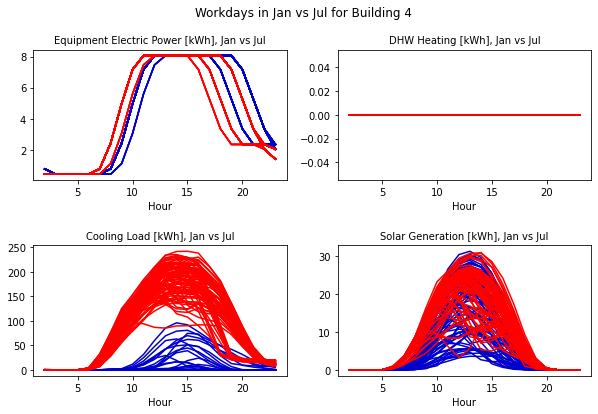

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(10,6))

plt.subplot(2, 2, 1)
col = "equipment_electric_power_kWh"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot1 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[0,0].plot(col, data=df_plot1, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot1 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[0,0].plot(col, data=df_plot1, label=idx, color="red")
ax[0,0].set_title('Equipment Electric Power [kWh], Jan vs Jul',fontsize=10)
ax[0,0].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 2)
col = "dhw_heating_kWh"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot2 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[0,1].plot(col, data=df_plot2, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot2 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[0,1].plot(col, data=df_plot2, label=idx, color="red")
ax[0,1].set_title('DHW Heating [kWh], Jan vs Jul',fontsize=10)
ax[0,1].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 3)
col="cooling_load_kWh"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot3 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[1,0].plot(col, data=df_plot3, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot3 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[1,0].plot(col, data=df_plot3, label=idx, color="red")
ax[1,0].set_title('Cooling Load [kWh], Jan vs Jul',fontsize=10)
ax[1,0].set_xlabel("Hour", fontsize=10)

plt.subplot(2, 2, 4)
col = "solar_generation_kW"
for idx, day in df_workday_jan.groupby(df_workday_jan.index.date):
    df_plot4 = df_workday_jan[df_workday_jan.index.date == idx].reset_index().rolling(3).mean()
    ax[1,1].plot(col, data=df_plot4, label=idx, color="mediumblue")

for idx, day in df_workday_jul.groupby(df_workday_jul.index.date):
    df_plot4 = df_workday_jul[df_workday_jul.index.date == idx].reset_index().rolling(3).mean()
    ax[1,1].plot(col, data=df_plot4, label=idx, color="red")
ax[1,1].set_title('Solar Generation [kWh], Jan vs Jul',fontsize=10)
ax[1,1].set_xlabel("Hour", fontsize=10)

fig.suptitle('Workdays in Jan vs Jul for Building 4')
plt.subplots_adjust(hspace = 0.5)

plt.show()


### Average energy demand and generation for Jan and Jul, workdays and weekends

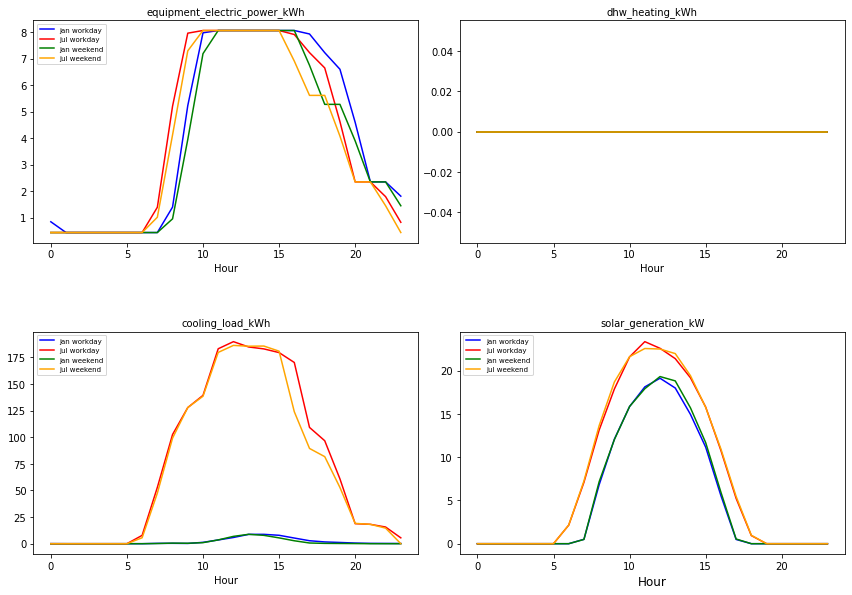

In [57]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))
fig.tight_layout()
plt.subplot(2, 2, 1)
col = "equipment_electric_power_kWh"
ax[0,0] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
ax[0,0] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
ax[0,0] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
ax[0,0] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
ax[0,0].set_title(col, fontsize=10)
ax[0,0].set_xlabel("Hour", fontsize=10)
ax[0,0].legend(fontsize=7, loc='upper left')

plt.subplot(2, 2, 2)
col = "dhw_heating_kWh"
ax[0,1] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
ax[0,1] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
ax[0,1] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
ax[0,1] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
ax[0,1].set_title(col, fontsize=10)
ax[0,1].set_xlabel("Hour", fontsize=10)
# ax[0,1].legend(fontsize=7, loc='upper right')

plt.subplot(2, 2, 3)
col = "cooling_load_kWh"
ax[1,0] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
ax[1,0] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
ax[1,0] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
ax[1,0] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
ax[1,0].legend(fontsize=7, loc='upper left')
ax[1,0].set_xlabel("Hour", fontsize=10)
ax[1,0].set_title(col, fontsize=10)

plt.subplot(2, 2, 4)
col = "solar_generation_kW"
ax[1,1] = df_workday_jan.groupby(df_workday_jan.index.hour)[col].mean().plot(label="jan workday", color="blue")
ax[1,1] = df_workday_jul.groupby(df_workday_jul.index.hour)[col].mean().plot(label="jul workday", color="red")
ax[1,1] = df_weekend_jan.groupby(df_weekend_jan.index.hour)[col].mean().plot(label="jan weekend", color="green")
ax[1,1] = df_weekend_jul.groupby(df_weekend_jul.index.hour)[col].mean().plot(label="jul weekend", color="orange")
ax[1,1].set_title(col, fontsize=10)
ax[1,1].set_xlabel("Hour", fontsize=12)
ax[1,1].legend(fontsize=7, loc='upper left')

#fig.suptitle('Average energy demand on workdays for Building 4 (strip mall retail)')
plt.subplots_adjust(hspace = 0.4)
plt.show()

### Average total load by month for Building 4 (with cooling)

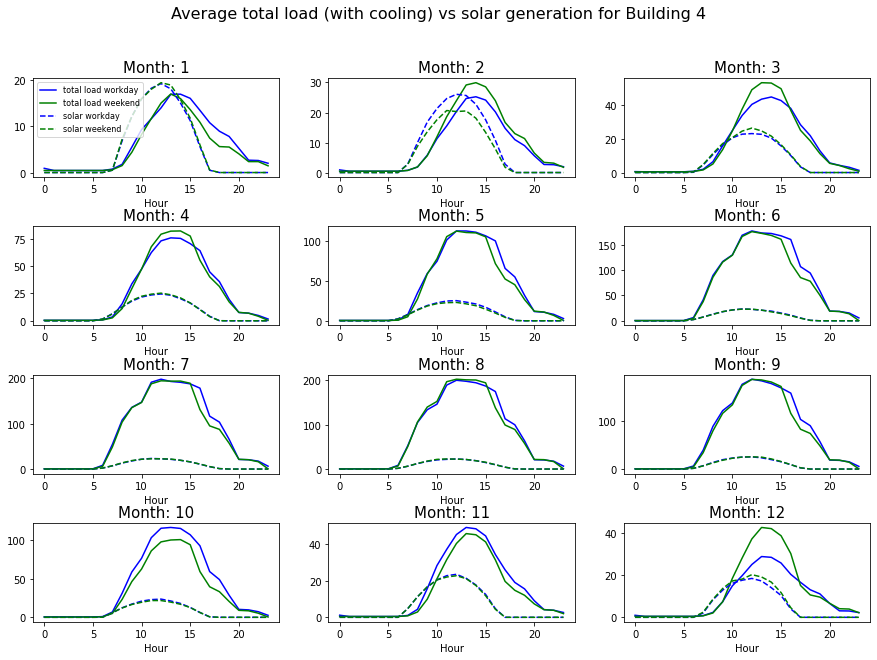

In [67]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))

for month in range(1,13):

    # Group by workdays
    df_workday = df[(df.index.month == month) & (df.workday == True)]

    # Group by weekends/holidays
    df_weekend = df[(df.index.month == month) & (df.workday == False)]

    plt.subplot(4, 3, month)
    col = "total_load_kWh"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="total load workday", color="blue")
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="total load weekend", color="green")

    col = "solar_generation_kW"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="solar workday", color="blue", linestyle='--')
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="solar weekend", color="green", linestyle='--')
    plt.xlabel('Hour')
    if month == 1:
        plt.legend(fontsize=8)
    plt.title('Month: '+str(month), fontsize=15)
fig.suptitle('Average total load (with cooling) vs solar generation for Building 4', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()

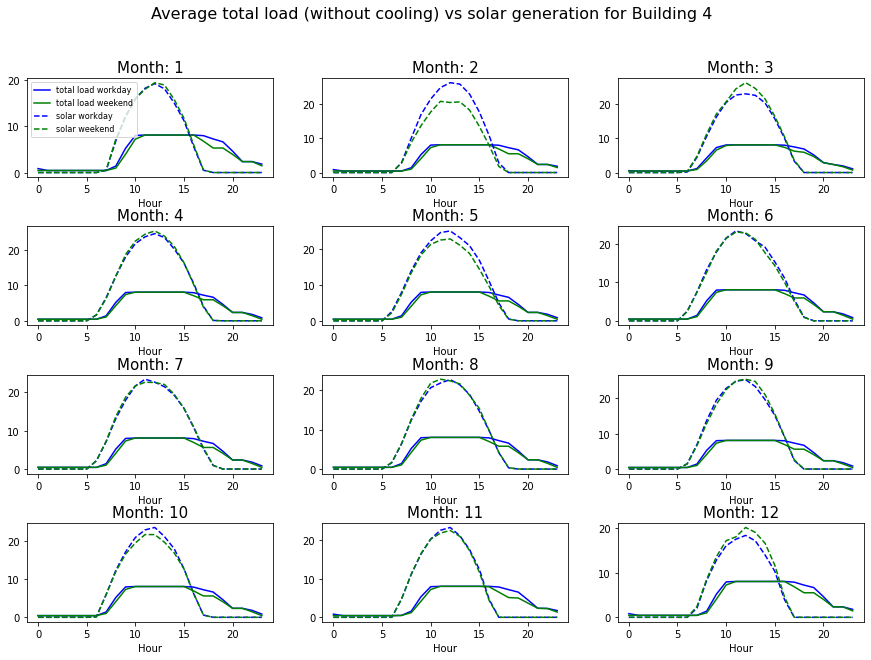

In [68]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))

for month in range(1,13):

    # Group by workdays
    df_workday = df[(df.index.month == month) & (df.workday == True)]

    # Group by weekends/holidays
    df_weekend = df[(df.index.month == month) & (df.workday == False)]

    plt.subplot(4, 3, month)
    col = "total_load_wo_cooling_kWh"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="total load workday", color="blue")
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="total load weekend", color="green")

    col = "solar_generation_kW"
    df_workday.groupby(df_workday.index.hour)[col].mean().plot(label="solar workday", color="blue", linestyle='--')
    df_weekend.groupby(df_weekend.index.hour)[col].mean().plot(label="solar weekend", color="green", linestyle='--')
    plt.xlabel('Hour')
    if month == 1:
        plt.legend(fontsize=8)
    plt.title('Month: '+str(month), fontsize=15)
fig.suptitle('Average total load (without cooling) vs solar generation for Building 4', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()